<a href="https://colab.research.google.com/github/ReanSchwarzer1/Notebooks/blob/master/Pandas_Basics_and_Intermediate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# World Food Facts


# Ex3 - Getting and Knowing your Data

Check out [Occupation Exercises Video Tutorial](https://www.youtube.com/watch?v=W8AB5s-L3Rw&list=PLgJhDSE2ZLxaY_DigHeiIDC1cD09rXgJv&index=4) to watch a data scientist go through the exercises

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [0]:
import pandas as pd

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user). 

### Step 3. Assign it to a variable called users and use the 'user_id' as index

In [0]:
users = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user', 
                      sep='|', index_col='user_id')

### Step 4. See the first 25 entries

In [0]:
users.head(25)

,age,gender,occupation,zip_code
user_id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213
6,42,M,executive,98101
7,57,M,administrator,91344
8,36,M,administrator,05201
9,29,M,student,01002


### Step 5. See the last 10 entries

In [0]:
users.tail(10)

,age,gender,occupation,zip_code
user_id,,,,
934,61,M,engineer,22902
935,42,M,doctor,66221
936,24,M,other,32789
937,48,M,educator,98072
938,38,F,technician,55038
939,26,F,student,33319
940,32,M,administrator,02215
941,20,M,student,97229
942,48,F,librarian,78209


### Step 6. What is the number of observations in the dataset?

In [0]:
users.shape[0]

943

### Step 7. What is the number of columns in the dataset?

In [0]:
users.shape[1]

4

### Step 8. Print the name of all the columns.

In [0]:
users.columns

Index(['age', 'gender', 'occupation', 'zip_code'], dtype='object')

### Step 9. How is the dataset indexed?

In [0]:
# "the index" (aka "the labels")
users.index

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            934, 935, 936, 937, 938, 939, 940, 941, 942, 943],
           dtype='int64', name='user_id', length=943)

### Step 10. What is the data type of each column?

In [0]:
users.dtypes

age            int64
gender        object
occupation    object
zip_code      object
dtype: object

### Step 11. Print only the occupation column

In [0]:
users.occupation

#or

users['occupation']

user_id
1         technician
2              other
3             writer
4         technician
5              other
6          executive
7      administrator
8      administrator
9            student
10            lawyer
11             other
12             other
13          educator
14         scientist
15          educator
16     entertainment
17        programmer
18             other
19         librarian
20         homemaker
21            writer
22            writer
23            artist
24            artist
25          engineer
26          engineer
27         librarian
28            writer
29        programmer
30           student
           ...      
914            other
915    entertainment
916         engineer
917          student
918        scientist
919            other
920           artist
921          student
922    administrator
923          student
924            other
925         salesman
926    entertainment
927       programmer
928          student
929        scientist
930  

### Step 12. How many different occupations are in this dataset?

In [0]:
users.occupation.nunique()
#or by using value_counts() which returns the count of unique elements
#users.occupation.value_counts().count()

21

### Step 13. What is the most frequent occupation?

In [0]:
#Because "most" is asked
users.occupation.value_counts().head(1).index[0]

#or
#to have the top 5

# users.occupation.value_counts().head()

'student'

### Step 14. Summarize the DataFrame.

In [0]:
users.describe() #Notice: by default, only the numeric columns are returned. 

,age
count,943.000000
mean,34.051962
std,12.192740
min,7.000000
25%,25.000000
50%,31.000000
75%,43.000000
max,73.000000


### Step 15. Summarize all the columns

In [0]:
users.describe(include = "all") #Notice: By default, only the numeric columns are returned.

,age,gender,occupation,zip_code
count,943.000000,943,943,943
unique,NaN,2,21,795
top,NaN,M,student,55414
freq,NaN,670,196,9
mean,34.051962,NaN,NaN,NaN
std,12.192740,NaN,NaN,NaN
min,7.000000,NaN,NaN,NaN
25%,25.000000,NaN,NaN,NaN
50%,31.000000,NaN,NaN,NaN
75%,43.000000,NaN,NaN,NaN


### Step 16. Summarize only the occupation column

In [0]:
users.occupation.describe()

count         943
unique         21
top       student
freq          196
Name: occupation, dtype: object

### Step 17. What is the mean age of users?

In [0]:
round(users.age.mean())

34

### Step 18. What is the age with least occurrence?

In [0]:
users.age.value_counts().tail() #7, 10, 11, 66 and 73 years -> only 1 occurrence

11    1
10    1
73    1
66    1
7     1
Name: age, dtype: int64

# Fictional Army - Filtering and Sorting

### Introduction:

This exercise was inspired by this [page](http://chrisalbon.com/python/)

Special thanks to: https://github.com/chrisalbon for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [0]:
import pandas as pd

### Step 2. This is the data given as a dictionary

In [0]:
# Create an example dataframe about a fictional army
raw_data = {'regiment': ['Nighthawks', 'Nighthawks', 'Nighthawks', 'Nighthawks', 'Dragoons', 'Dragoons', 'Dragoons', 'Dragoons', 'Scouts', 'Scouts', 'Scouts', 'Scouts'],
            'company': ['1st', '1st', '2nd', '2nd', '1st', '1st', '2nd', '2nd','1st', '1st', '2nd', '2nd'],
            'deaths': [523, 52, 25, 616, 43, 234, 523, 62, 62, 73, 37, 35],
            'battles': [5, 42, 2, 2, 4, 7, 8, 3, 4, 7, 8, 9],
            'size': [1045, 957, 1099, 1400, 1592, 1006, 987, 849, 973, 1005, 1099, 1523],
            'veterans': [1, 5, 62, 26, 73, 37, 949, 48, 48, 435, 63, 345],
            'readiness': [1, 2, 3, 3, 2, 1, 2, 3, 2, 1, 2, 3],
            'armored': [1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1],
            'deserters': [4, 24, 31, 2, 3, 4, 24, 31, 2, 3, 2, 3],
            'origin': ['Arizona', 'California', 'Texas', 'Florida', 'Maine', 'Iowa', 'Alaska', 'Washington', 'Oregon', 'Wyoming', 'Louisana', 'Georgia']}

### Step 3. Create a dataframe and assign it to a variable called army. 

#### Don't forget to include the columns names in the order presented in the dictionary ('regiment', 'company', 'deaths'...) so that the column index order is consistent with the solutions. If omitted, pandas will order the columns alphabetically.

In [0]:
army = pd.DataFrame(data=raw_data)
army

,regiment,company,deaths,battles,size,veterans,readiness,armored,deserters,origin
0,Nighthawks,1st,523,5,1045,1,1,1,4,Arizona
1,Nighthawks,1st,52,42,957,5,2,0,24,California
2,Nighthawks,2nd,25,2,1099,62,3,1,31,Texas
3,Nighthawks,2nd,616,2,1400,26,3,1,2,Florida
4,Dragoons,1st,43,4,1592,73,2,0,3,Maine
5,Dragoons,1st,234,7,1006,37,1,1,4,Iowa
6,Dragoons,2nd,523,8,987,949,2,0,24,Alaska
7,Dragoons,2nd,62,3,849,48,3,1,31,Washington
8,Scouts,1st,62,4,973,48,2,0,2,Oregon
9,Scouts,1st,73,7,1005,435,1,0,3,Wyoming


### Step 4. Set the 'origin' colum as the index of the dataframe

In [0]:
army.set_index('origin', inplace=True)

### Step 5. Print only the column veterans

In [0]:
army.veterans

origin
Arizona         1
California      5
Texas          62
Florida        26
Maine          73
Iowa           37
Alaska        949
Washington     48
Oregon         48
Wyoming       435
Louisana       63
Georgia       345
Name: veterans, dtype: int64

### Step 6. Print the columns 'veterans' and 'deaths'

In [0]:
army[["veterans", "deaths"]]

,veterans,deaths
origin,,
Arizona,1,523
California,5,52
Texas,62,25
Florida,26,616
Maine,73,43
Iowa,37,234
Alaska,949,523
Washington,48,62
Oregon,48,62


### Step 7. Print the name of all the columns.

In [0]:
army.columns

Index(['regiment', 'company', 'deaths', 'battles', 'size', 'veterans',
       'readiness', 'armored', 'deserters'],
      dtype='object')

### Step 8. Select the 'deaths', 'size' and 'deserters' columns from Maine and Alaska

In [0]:
army.loc[["Maine", "Alaska"], ["deaths", "size", "deserters"]]

,deaths,size,deserters
origin,,,
Maine,43,1592,3
Alaska,523,987,24


### Step 9. Select the rows 3 to 7 and the columns 3 to 6

In [0]:
army.iloc[2:7, 2:6]

,deaths,battles,size,veterans
origin,,,,
Texas,25,2,1099,62
Florida,616,2,1400,26
Maine,43,4,1592,73
Iowa,234,7,1006,37
Alaska,523,8,987,949


### Step 10. Select every row after the fourth row and all columns

In [0]:
army.iloc[4:, :]

,regiment,company,deaths,battles,size,veterans,readiness,armored,deserters
origin,,,,,,,,,
Maine,Dragoons,1st,43,4,1592,73,2,0,3
Iowa,Dragoons,1st,234,7,1006,37,1,1,4
Alaska,Dragoons,2nd,523,8,987,949,2,0,24
Washington,Dragoons,2nd,62,3,849,48,3,1,31
Oregon,Scouts,1st,62,4,973,48,2,0,2
Wyoming,Scouts,1st,73,7,1005,435,1,0,3
Louisana,Scouts,2nd,37,8,1099,63,2,1,2
Georgia,Scouts,2nd,35,9,1523,345,3,1,3


### Step 11. Select every row up to the 4th row and all columns

In [0]:
army.iloc[:4, :]

,regiment,company,deaths,battles,size,veterans,readiness,armored,deserters
origin,,,,,,,,,
Arizona,Nighthawks,1st,523,5,1045,1,1,1,4
California,Nighthawks,1st,52,42,957,5,2,0,24
Texas,Nighthawks,2nd,25,2,1099,62,3,1,31
Florida,Nighthawks,2nd,616,2,1400,26,3,1,2


### Step 12. Select the 3rd column up to the 7th column

In [0]:
army.iloc[:, 2:7]

,deaths,battles,size,veterans,readiness
origin,,,,,
Arizona,523,5,1045,1,1
California,52,42,957,5,2
Texas,25,2,1099,62,3
Florida,616,2,1400,26,3
Maine,43,4,1592,73,2
Iowa,234,7,1006,37,1
Alaska,523,8,987,949,2
Washington,62,3,849,48,3
Oregon,62,4,973,48,2


### Step 13. Select rows where df.deaths is greater than 50

In [0]:
army[army["deaths"] > 50]

,regiment,company,deaths,battles,size,veterans,readiness,armored,deserters
origin,,,,,,,,,
Arizona,Nighthawks,1st,523,5,1045,1,1,1,4
California,Nighthawks,1st,52,42,957,5,2,0,24
Florida,Nighthawks,2nd,616,2,1400,26,3,1,2
Iowa,Dragoons,1st,234,7,1006,37,1,1,4
Alaska,Dragoons,2nd,523,8,987,949,2,0,24
Washington,Dragoons,2nd,62,3,849,48,3,1,31
Oregon,Scouts,1st,62,4,973,48,2,0,2
Wyoming,Scouts,1st,73,7,1005,435,1,0,3


### Step 14. Select rows where df.deaths is greater than 500 or less than 50

In [0]:
army[(army["deaths"] > 500) | (army["deaths"] < 50)]

,regiment,company,deaths,battles,size,veterans,readiness,armored,deserters
origin,,,,,,,,,
Arizona,Nighthawks,1st,523,5,1045,1,1,1,4
Texas,Nighthawks,2nd,25,2,1099,62,3,1,31
Florida,Nighthawks,2nd,616,2,1400,26,3,1,2
Maine,Dragoons,1st,43,4,1592,73,2,0,3
Alaska,Dragoons,2nd,523,8,987,949,2,0,24
Louisana,Scouts,2nd,37,8,1099,63,2,1,2
Georgia,Scouts,2nd,35,9,1523,345,3,1,3


### Step 15. Select all the regiments not named "Dragoons"

In [0]:
army[army["regiment"] != "Dragoons"]

,regiment,company,deaths,battles,size,veterans,readiness,armored,deserters
origin,,,,,,,,,
Arizona,Nighthawks,1st,523,5,1045,1,1,1,4
California,Nighthawks,1st,52,42,957,5,2,0,24
Texas,Nighthawks,2nd,25,2,1099,62,3,1,31
Florida,Nighthawks,2nd,616,2,1400,26,3,1,2
Oregon,Scouts,1st,62,4,973,48,2,0,2
Wyoming,Scouts,1st,73,7,1005,435,1,0,3
Louisana,Scouts,2nd,37,8,1099,63,2,1,2
Georgia,Scouts,2nd,35,9,1523,345,3,1,3


### Step 16. Select the rows called Texas and Arizona

In [0]:
army.loc[["Texas", "Arizona"], :]

,regiment,company,deaths,battles,size,veterans,readiness,armored,deserters
origin,,,,,,,,,
Texas,Nighthawks,2nd,25,2,1099,62,3,1,31
Arizona,Nighthawks,1st,523,5,1045,1,1,1,4


### Step 17. Select the third cell in the row named Arizona

In [0]:
army.loc[["Arizona"]].iloc[:, 2]

origin
Arizona    523
Name: deaths, dtype: int64

### Step 18. Select the third cell down in the column named deaths

In [0]:
army.loc[:, ["deaths"]].iloc[2]

deaths    25
Name: Texas, dtype: int64

# Ex - GroupBy

### Introduction:

GroupBy can be summarized as Split-Apply-Combine.

Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

Check out this [Diagram](http://i.imgur.com/yjNkiwL.png)  
### Step 1. Import the necessary libraries

In [0]:
import pandas as pd

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/drinks.csv). 

### Step 3. Assign it to a variable called drinks.

In [0]:
drinks = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/drinks.csv')
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


### Step 4. Which continent drinks more beer on average?

In [0]:
drinks.groupby('continent').beer_servings.mean()

continent
AF     61.471698
AS     37.045455
EU    193.777778
OC     89.687500
SA    175.083333
Name: beer_servings, dtype: float64

### Step 5. For each continent print the statistics for wine consumption.

In [0]:
drinks.groupby('continent').wine_servings.describe()

continent       
AF         count     53.000000
           mean      16.264151
           std       38.846419
           min        0.000000
           25%        1.000000
           50%        2.000000
           75%       13.000000
           max      233.000000
AS         count     44.000000
           mean       9.068182
           std       21.667034
           min        0.000000
           25%        0.000000
           50%        1.000000
           75%        8.000000
           max      123.000000
EU         count     45.000000
           mean     142.222222
           std       97.421738
           min        0.000000
           25%       59.000000
           50%      128.000000
           75%      195.000000
           max      370.000000
OC         count     16.000000
           mean      35.625000
           std       64.555790
           min        0.000000
           25%        1.000000
           50%        8.500000
           75%       23.250000
           max      21

### Step 6. Print the mean alcohol consumption per continent for every column

In [0]:
drinks.groupby('continent').mean()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
AF,61.471698,16.339623,16.264151,3.007547
AS,37.045455,60.840909,9.068182,2.170455
EU,193.777778,132.555556,142.222222,8.617778
OC,89.687500,58.437500,35.625000,3.381250
SA,175.083333,114.750000,62.416667,6.308333


### Step 7. Print the median alcohol consumption per continent for every column

In [0]:
drinks.groupby('continent').median()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
AF,32.0,3.0,2.0,2.30
AS,17.5,16.0,1.0,1.20
EU,219.0,122.0,128.0,10.00
OC,52.5,37.0,8.5,1.75
SA,162.5,108.5,12.0,6.85


### Step 8. Print the mean, min and max values for spirit consumption.
#### This time output a DataFrame

In [0]:
drinks.groupby('continent').spirit_servings.agg(['mean', 'min', 'max'])

,mean,min,max
continent,,,
AF,16.339623,0,152
AS,60.840909,0,326
EU,132.555556,0,373
OC,58.437500,0,254
SA,114.750000,25,302


# United States - Crime Rates - 1960 - 2014

### Introduction:

This time you will create a data 

Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [0]:
import numpy as np
import pandas as pd

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/04_Apply/US_Crime_Rates/US_Crime_Rates_1960_2014.csv). 

### Step 3. Assign it to a variable called crime.

In [0]:
url = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/04_Apply/US_Crime_Rates/US_Crime_Rates_1960_2014.csv"
crime = pd.read_csv(url)
crime.head()

,Year,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
0,1960,179323175,3384200,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1,1961,182992000,3488000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
2,1962,185771000,3752200,301510,3450700,8530,17550,110860,164570,994300,2089600,366800
3,1963,188483000,4109500,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300
4,1964,191141000,4564600,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800


### Step 4. What is the type of the columns?

In [0]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 12 columns):
Year                  55 non-null int64
Population            55 non-null int64
Total                 55 non-null int64
Violent               55 non-null int64
Property              55 non-null int64
Murder                55 non-null int64
Forcible_Rape         55 non-null int64
Robbery               55 non-null int64
Aggravated_assault    55 non-null int64
Burglary              55 non-null int64
Larceny_Theft         55 non-null int64
Vehicle_Theft         55 non-null int64
dtypes: int64(12)
memory usage: 5.2 KB


##### Have you noticed that the type of Year is int64. But pandas has a different type to work with Time Series. Let's see it now.

### Step 5. Convert the type of the column Year to datetime64

In [0]:
# pd.to_datetime(crime)
crime.Year = pd.to_datetime(crime.Year, format='%Y')
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 12 columns):
Year                  55 non-null datetime64[ns]
Population            55 non-null int64
Total                 55 non-null int64
Violent               55 non-null int64
Property              55 non-null int64
Murder                55 non-null int64
Forcible_Rape         55 non-null int64
Robbery               55 non-null int64
Aggravated_assault    55 non-null int64
Burglary              55 non-null int64
Larceny_Theft         55 non-null int64
Vehicle_Theft         55 non-null int64
dtypes: datetime64[ns](1), int64(11)
memory usage: 5.2 KB


### Step 6. Set the Year column as the index of the dataframe

In [0]:
crime = crime.set_index('Year', drop = True)
crime.head()

,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
Year,,,,,,,,,,,
1960-01-01,179323175,3384200,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1961-01-01,182992000,3488000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
1962-01-01,185771000,3752200,301510,3450700,8530,17550,110860,164570,994300,2089600,366800
1963-01-01,188483000,4109500,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300
1964-01-01,191141000,4564600,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800


### Step 7. Delete the Total column

In [0]:
del crime['Total']
crime.head()

,Population,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
Year,,,,,,,,,,
1960-01-01,179323175,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1961-01-01,182992000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
1962-01-01,185771000,301510,3450700,8530,17550,110860,164570,994300,2089600,366800
1963-01-01,188483000,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300
1964-01-01,191141000,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800


### Step 8. Group the year by decades and sum the values

#### Pay attention to the Population column number, summing this column is a mistake

In [0]:
# To learn more about .resample (https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.resample.html)
# To learn more about Offset Aliases (http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases)

# Uses resample to sum each decade
crimes = crime.resample('10AS').sum()

# Uses resample to get the max value only for the "Population" column
population = crime['Population'].resample('10AS').max()

# Updating the "Population" column
crimes['Population'] = population

crimes

,Population,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
1960,201385000,4134930,45160900,106180,236720,1633510,2158520,13321100,26547700,5292100
1970,220099000,9607930,91383800,192230,554570,4159020,4702120,28486000,53157800,9739900
1980,248239000,14074328,117048900,206439,865639,5383109,7619130,33073494,72040253,11935411
1990,272690813,17527048,119053499,211664,998827,5748930,10568963,26750015,77679366,14624418
2000,307006550,13968056,100944369,163068,922499,4230366,8652124,21565176,67970291,11412834
2010,318857056,6072017,44095950,72867,421059,1749809,3764142,10125170,30401698,3569080


### Step 9. What is the most dangerous decade to live in the US?

In [0]:
# apparently the 90s was a pretty dangerous time in the US
crime.idxmax(0)

Population            2010
Violent               1990
Property              1990
Murder                1990
Forcible_Rape         1990
Robbery               1990
Aggravated_assault    1990
Burglary              1980
Larceny_Theft         1990
Vehicle_Theft         1990
dtype: int64

# Fictitious Names

### Introduction:

This time you will create a data again 

Special thanks to [Chris Albon](http://chrisalbon.com/) for sharing the dataset and materials.
All the credits to this exercise belongs to him.  

In order to understand about it go to [here](https://blog.codinghorror.com/a-visual-explanation-of-sql-joins/).

### Step 1. Import the necessary libraries

In [0]:
import pandas as pd

### Step 2. Create the 3 DataFrames based on the following raw data

In [0]:
raw_data_1 = {
        'subject_id': ['1', '2', '3', '4', '5'],
        'first_name': ['Alex', 'Amy', 'Allen', 'Alice', 'Ayoung'], 
        'last_name': ['Anderson', 'Ackerman', 'Ali', 'Aoni', 'Atiches']}

raw_data_2 = {
        'subject_id': ['4', '5', '6', '7', '8'],
        'first_name': ['Billy', 'Brian', 'Bran', 'Bryce', 'Betty'], 
        'last_name': ['Bonder', 'Black', 'Balwner', 'Brice', 'Btisan']}

raw_data_3 = {
        'subject_id': ['1', '2', '3', '4', '5', '7', '8', '9', '10', '11'],
        'test_id': [51, 15, 15, 61, 16, 14, 15, 1, 61, 16]}

### Step 3. Assign each to a variable called data1, data2, data3

In [0]:
data1 = pd.DataFrame(raw_data_1, columns = ['subject_id', 'first_name', 'last_name'])
data2 = pd.DataFrame(raw_data_2, columns = ['subject_id', 'first_name', 'last_name'])
data3 = pd.DataFrame(raw_data_3, columns = ['subject_id','test_id'])

data3

,subject_id,test_id
0,1,51
1,2,15
2,3,15
3,4,61
4,5,16
5,7,14
6,8,15
7,9,1
8,10,61
9,11,16


### Step 4. Join the two dataframes along rows and assign all_data

In [0]:
all_data = pd.concat([data1, data2])
all_data

,subject_id,first_name,last_name
0,1,Alex,Anderson
1,2,Amy,Ackerman
2,3,Allen,Ali
3,4,Alice,Aoni
4,5,Ayoung,Atiches
0,4,Billy,Bonder
1,5,Brian,Black
2,6,Bran,Balwner
3,7,Bryce,Brice
4,8,Betty,Btisan


### Step 5. Join the two dataframes along columns and assing to all_data_col

In [0]:
all_data_col = pd.concat([data1, data2], axis = 1)
all_data_col

,subject_id,first_name,last_name,subject_id,first_name,last_name
0,1,Alex,Anderson,4,Billy,Bonder
1,2,Amy,Ackerman,5,Brian,Black
2,3,Allen,Ali,6,Bran,Balwner
3,4,Alice,Aoni,7,Bryce,Brice
4,5,Ayoung,Atiches,8,Betty,Btisan


### Step 6. Print data3

In [0]:
data3

,subject_id,test_id
0,1,51
1,2,15
2,3,15
3,4,61
4,5,16
5,7,14
6,8,15
7,9,1
8,10,61
9,11,16


### Step 7. Merge all_data and data3 along the subject_id value

In [0]:
pd.merge(all_data, data3, on='subject_id')

,subject_id,first_name,last_name,test_id
0,1,Alex,Anderson,51
1,2,Amy,Ackerman,15
2,3,Allen,Ali,15
3,4,Alice,Aoni,61
4,4,Billy,Bonder,61
5,5,Ayoung,Atiches,16
6,5,Brian,Black,16
7,7,Bryce,Brice,14
8,8,Betty,Btisan,15


### Step 8. Merge only the data that has the same 'subject_id' on both data1 and data2

In [0]:
pd.merge(data1, data2, on='subject_id', how='inner')

,subject_id,first_name_x,last_name_x,first_name_y,last_name_y
0,4,Alice,Aoni,Billy,Bonder
1,5,Ayoung,Atiches,Brian,Black


### Step 9. Merge all values in data1 and data2, with matching records from both sides where available.

In [0]:
pd.merge(data1, data2, on='subject_id', how='outer')

,subject_id,first_name_x,last_name_x,first_name_y,last_name_y
0,1,Alex,Anderson,NaN,NaN
1,2,Amy,Ackerman,NaN,NaN
2,3,Allen,Ali,NaN,NaN
3,4,Alice,Aoni,Billy,Bonder
4,5,Ayoung,Atiches,Brian,Black
5,6,NaN,NaN,Bran,Balwner
6,7,NaN,NaN,Bryce,Brice
7,8,NaN,NaN,Betty,Btisan


# US - Baby Names

### Introduction:

We are going to use a subset of [US Baby Names](https://www.kaggle.com/kaggle/us-baby-names) from Kaggle.  
In the file it will be names from 2004 until 2014


### Step 1. Import the necessary libraries

In [0]:
import pandas as pd

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/US_Baby_Names/US_Baby_Names_right.csv). 

### Step 3. Assign it to a variable called baby_names.

In [0]:
baby_names = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/US_Baby_Names/US_Baby_Names_right.csv')
baby_names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1016395 entries, 0 to 1016394
Data columns (total 7 columns):
Unnamed: 0    1016395 non-null int64
Id            1016395 non-null int64
Name          1016395 non-null object
Year          1016395 non-null int64
Gender        1016395 non-null object
State         1016395 non-null object
Count         1016395 non-null int64
dtypes: int64(4), object(3)
memory usage: 54.3+ MB


### Step 4. See the first 10 entries

In [0]:
baby_names.head(10)

,Unnamed: 0,Id,Name,Year,Gender,State,Count
0,11349,11350,Emma,2004,F,AK,62
1,11350,11351,Madison,2004,F,AK,48
2,11351,11352,Hannah,2004,F,AK,46
3,11352,11353,Grace,2004,F,AK,44
4,11353,11354,Emily,2004,F,AK,41
5,11354,11355,Abigail,2004,F,AK,37
6,11355,11356,Olivia,2004,F,AK,33
7,11356,11357,Isabella,2004,F,AK,30
8,11357,11358,Alyssa,2004,F,AK,29
9,11358,11359,Sophia,2004,F,AK,28


### Step 5. Delete the column 'Unnamed: 0' and 'Id'

In [0]:
# deletes Unnamed: 0
del baby_names['Unnamed: 0']

# deletes Unnamed: 0
del baby_names['Id']

baby_names.head()

,Name,Year,Gender,State,Count
0,Emma,2004,F,AK,62
1,Madison,2004,F,AK,48
2,Hannah,2004,F,AK,46
3,Grace,2004,F,AK,44
4,Emily,2004,F,AK,41


### Step 6. Are there more male or female names in the dataset?

In [0]:
baby_names['Gender'].value_counts()

F    558846
M    457549
Name: Gender, dtype: int64

### Step 7. Group the dataset by name and assign to names

In [0]:
# you don't want to sum the Year column, so you delete it
del baby_names["Year"]

# group the data
names = baby_names.groupby("Name").sum()

# print the first 5 observations
names.head()

# print the size of the dataset
print(names.shape)

# sort it from the biggest value to the smallest one
names.sort_values("Count", ascending = 0).head()

(17632, 1)


,Count
Name,
Jacob,242874
Emma,214852
Michael,214405
Ethan,209277
Isabella,204798


### Step 8. How many different names exist in the dataset?

In [0]:
# as we have already grouped by the name, all the names are unique already. 
# get the length of names
len(names)

17632

### Step 9. What is the name with most occurrences?

In [0]:
names.Count.idxmax()

# OR

# names[names.Count == names.Count.max()]

'Jacob'

### Step 10. How many different names have the least occurrences?

In [0]:
len(names[names.Count == names.Count.min()])

2578

### Step 11. What is the median name occurrence?

In [0]:
names[names.Count == names.Count.median()]

,Count
Name,
Aishani,49
Alara,49
Alysse,49
Ameir,49
Anely,49
Antonina,49
Aveline,49
Aziah,49
Baily,49


### Step 12. What is the standard deviation of names?

In [0]:
names.Count.std()

11006.069467891111

### Step 13. Get a summary with the mean, min, max, std and quartiles.

In [0]:
names.describe()

,Count
count,17632.000000
mean,2008.932169
std,11006.069468
min,5.000000
25%,11.000000
50%,49.000000
75%,337.000000
max,242874.000000


# Online Retails Purchase

### Introduction:



### Step 1. Import the necessary libraries

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# set the graphs to show in the jupyter notebook
%matplotlib inline

# set seaborn graphs to a better style
sns.set(style="ticks")

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Online_Retail/Online_Retail.csv). 

### Step 3. Assign it to a variable called online_rt
Note: if you receive a utf-8 decode error, set `encoding = 'latin1'` in `pd.read_csv()`.

In [0]:
path = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Online_Retail/Online_Retail.csv'

online_rt = pd.read_csv(path, encoding = 'latin1')

online_rt.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


### Step 4. Create a histogram with the 10 countries that have the most 'Quantity' ordered except UK

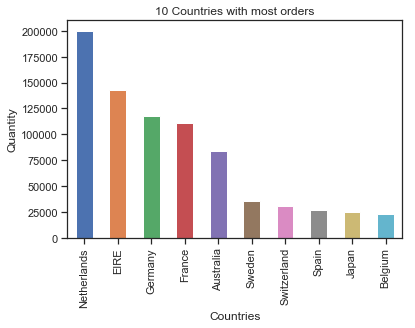

In [0]:
# group by the Country
countries = online_rt.groupby('Country').sum()

# sort the value and get the first 10 after UK
countries = countries.sort_values(by = 'Quantity',ascending = False)[1:11]

# create the plot
countries['Quantity'].plot(kind='bar')

# Set the title and labels
plt.xlabel('Countries')
plt.ylabel('Quantity')
plt.title('10 Countries with most orders')

# show the plot
plt.show()

### Step 5.  Exclude negative Quantity entries

In [0]:
online_rt = online_rt[online_rt.Quantity > 0]
online_rt.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


### Step 6. Create a scatterplot with the Quantity per UnitPrice by CustomerID for the top 3 Countries (except UK)

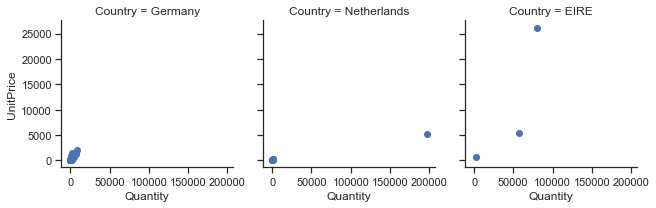

In [0]:
# groupby CustomerID
customers = online_rt.groupby(['CustomerID','Country']).sum()

# there is an outlier with negative price
customers = customers[customers.UnitPrice > 0]

# get the value of the index and put in the column Country
customers['Country'] = customers.index.get_level_values(1)

# top three countries
top_countries =  ['Netherlands', 'EIRE', 'Germany']

# filter the dataframe to just select ones in the top_countries
customers = customers[customers['Country'].isin(top_countries)]

#################
# Graph Section #
#################

# creates the FaceGrid
g = sns.FacetGrid(customers, col="Country")

# map over a make a scatterplot
g.map(plt.scatter, "Quantity", "UnitPrice", alpha=1)

# adds legend
g.add_legend()

### Step 7. Investigate why the previous results look so uninformative.

This section might seem a bit tedious to go through. But I've thought of it as some kind of a simulation of problems one might encounter when dealing with data and other people. Besides there is a prize at the end (i.e. Section 8).

(But feel free to jump right ahead into Section 8 if you want; it doesn't require that you finish this section.)

#### Step 7.1 Look at the first line of code in Step 6. And try to figure out if it leads to any kind of problem.
##### Step 7.1.1 Display the first few rows of that DataFrame.

In [0]:
#This takes our initial dataframe groups it primarily by 'CustomerID' and secondarily by 'Country'.
#It sums all the (non-indexical) columns that have numerical values under each group.
customers = online_rt.groupby(['CustomerID','Country']).sum().head()

#Here's what it looks like:
customers

,,Quantity,UnitPrice
CustomerID,Country,,
12346.0,United Kingdom,74215,1.04
12347.0,Iceland,2458,481.21
12348.0,Finland,2341,178.71
12349.0,Italy,631,605.10
12350.0,Norway,197,65.30


##### Step 7.1.2 Think about what that piece of code does and display the dtype of `UnitPrice`

In [0]:
customers.UnitPrice.dtype
#So it's 'float64'
#But why did we sum 'UnitPrice', to begin with?
#If 'UnitPrice' wasn't something that we were interested in then it would be OK
#since we wouldn't care whether UnitPrice was being summed or not.
#But we want our graphs to reflect 'UnitPrice'!
#Note that summing up 'UnitPrice' can be highly misleading.
#It doesn't tell us much as to what the customer is doing.
#Suppose, a customer places one order of 1000 items that are worth $1 each.
#Another customer places a thousand orders of 1 item worth $1.
#There isn't much of a difference between what the former and the latter customers did.
#After all, they've spent the same amount of money.
#so we should be careful when we're summing columns. Sometimes we intend to sum just one column
#('Quantity' in this case) and another column like UnitPrice gets ito the mix.

dtype('float64')

##### Step 7.1.3 Pull data from `online_rt`for `CustomerID`s 12346.0 and 12347.0.

In [0]:
display(online_rt[online_rt.CustomerID == 12347.0].
        sort_values(by='UnitPrice', ascending = False).head())
display(online_rt[online_rt.CustomerID == 12346.0].
        sort_values(by='UnitPrice', ascending = False).head())
#The result is exactly what we'd suspected. Customer 12346.0 placed
#one giant order, whereas 12347.0 placed a lot of smaller orders.
#So we've identified one potential reason why our plots looked so weird at section 6.
#At this stage we need to go back to the initial problem we've specified at section 6.
#And make it more precise.

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
428966,573511,22423,REGENCY CAKESTAND 3 TIER,6,10/31/11 12:25,12.75,12347.0,Iceland
286637,562032,22423,REGENCY CAKESTAND 3 TIER,3,8/2/11 8:48,12.75,12347.0,Iceland
72267,542237,22423,REGENCY CAKESTAND 3 TIER,3,1/26/11 14:30,12.75,12347.0,Iceland
148300,549222,22423,REGENCY CAKESTAND 3 TIER,3,4/7/11 10:43,12.75,12347.0,Iceland
428967,573511,23173,REGENCY TEAPOT ROSES,2,10/31/11 12:25,9.95,12347.0,Iceland


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1/18/11 10:01,1.04,12346.0,United Kingdom


#### Step 7.2 Reinterpreting the initial problem.

To reiterate the question that we were dealing with:  
"Create a scatterplot with the Quantity per UnitPrice by CustomerID for the top 3 Countries"

The question is open to a set of different interpretations.
We need to disambiguate.

We could do a single plot by looking at all the data from the top 3 countries.
Or we could do one plot per country. To keep things consistent with the rest of the exercise,
let's stick to the latter oprion. So that's settled.

But "top 3 countries" with respect to what? Two answers suggest themselves:
Total sales volume (i.e. total quantity sold) or total sales (i.e. revenue).
This exercise goes for sales volume, so let's stick to that.

##### Step 7.2.1 Find out the top 3 countries in terms of sales volume.

In [0]:
sales_volume = online_rt.groupby('Country').Quantity.sum().sort_values(ascending=False)

top3 = sales_volume.index[1:4] #We are excluding UK
top3

Index(['Netherlands', 'EIRE', 'Germany'], dtype='object', name='Country')

##### Step 7.2.2 

Now that we have the top 3 countries, we can focus on the rest of the problem:  
"Quantity per UnitPrice by CustomerID".  
We need to unpack that.

"by CustomerID" part is easy. That means we're going to be plotting one dot per CustomerID's on our plot. In other words, we're going to be grouping by CustomerID.

"Quantity per UnitPrice" is trickier. Here's what we know:  
*One axis will represent a Quantity assigned to a given customer. This is easy; we can just plot the total  Quantity for each customer.  
*The other axis will represent a UnitPrice assigned to a given customer. Remember a single customer can have any number of orders with different prices, so summing up prices isn't quite helpful. Besides it's not quite clear what we mean when we say "unit price per customer"; it sounds like price of the customer! A reasonable alternative is that we assign each customer the average amount each has paid per item. So let's settle that question in that manner.

#### Step 7.3 Modify, select and plot data
##### Step 7.3.1 Add a column to online_rt called `Revenue` calculate the revenue (Quantity * UnitPrice) from each sale.
We will use this later to figure out an average price per customer.

In [0]:
online_rt['Revenue'] = online_rt.Quantity * online_rt.UnitPrice
online_rt.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34


##### Step 7.3.2 Group by `CustomerID` and `Country` and find out the average price (`AvgPrice`) each customer spends per unit.

In [0]:
grouped = online_rt[online_rt.Country.isin(top3)].groupby(['CustomerID','Country'])

plottable = grouped['Quantity','Revenue'].agg('sum')
plottable['AvgPrice'] = plottable.Revenue / plottable.Quantity

# get the value of the index and put in the column Country
plottable['Country'] = plottable.index.get_level_values(1)
plottable.head()

,,Quantity,Revenue,AvgPrice,Country
CustomerID,Country,,,,
12426.0,Germany,258,582.73,2.258643,Germany
12427.0,Germany,533,825.80,1.549343,Germany
12468.0,Germany,366,729.54,1.993279,Germany
12471.0,Germany,8212,19824.05,2.414034,Germany
12472.0,Germany,4148,6572.11,1.584405,Germany


##### Step 7.3.3 Plot

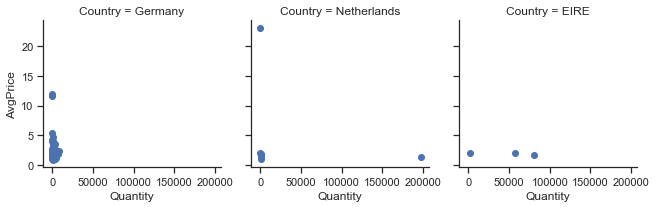

In [0]:
####################
# Graph Section v 2#
####################

# creates the FaceGrid
g = sns.FacetGrid(plottable, col="Country")

# map over a make a scatterplot
g.map(plt.scatter, "Quantity", "AvgPrice", alpha=1)

# adds legend
g.add_legend();

#### Step 7.4 What to do now?
We aren't much better-off than what we started with. The data are still extremely scattered around and don't seem quite informative.

But we shouldn't despair!
There are two things to realize:
1) The data seem to be skewed towaards the axes (e.g. we don't have any values where Quantity = 50000 and AvgPrice = 5). So that might suggest a trend.
2) We have more data! We've only been looking at the data from 3 different countries and they are plotted on different graphs.

So: we should plot the data regardless of `Country` and hopefully see a less scattered graph.

##### Step 7.4.1 Plot the data for each `CustomerID` on a single graph

[]

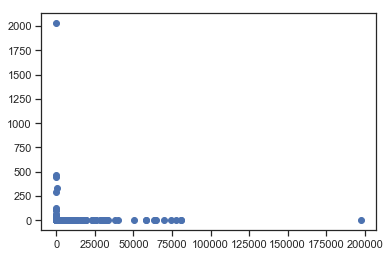

In [0]:
grouped = online_rt.groupby(['CustomerID'])
plottable = grouped['Quantity','Revenue'].agg('sum')
plottable['AvgPrice'] = plottable.Revenue / plottable.Quantity

# map over a make a scatterplot
plt.scatter(plottable.Quantity, plottable.AvgPrice)
plt.plot()


#Turns out the graph is still extremely skewed towards the axes like an exponential decay function.

##### Step 7.4.2 Zoom in so we can see that curve more clearly

[]

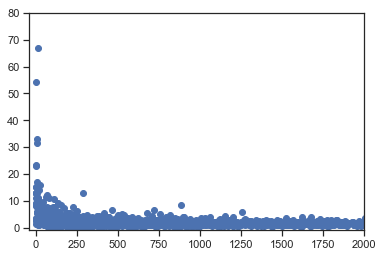

In [0]:
grouped = online_rt.groupby(['CustomerID','Country'])
plottable = grouped.agg({'Quantity': 'sum',
                         'Revenue': 'sum'})
plottable['AvgPrice'] = plottable.Revenue / plottable.Quantity

# map over a make a scatterplot
plt.scatter(plottable.Quantity, plottable.AvgPrice)

#Zooming in. (I'm starting the axes from a negative value so that
#the dots can be plotted in the graph completely.)
plt.xlim(-40,2000) 
plt.ylim(-1,80)

plt.plot()


#And there is still that pattern, this time in close-up!

### 8. Plot a line chart showing revenue (y) per UnitPrice (x).

Did Step 7 give us any insights about the data? Sure! As average price increases, the quantity ordered decreses.  But that's hardly surprising. It would be surprising if that wasn't the case!

Nevertheless the rate of drop in quantity is so drastic, it makes me wonder how our revenue changes with respect to item price. It would not be that surprising if it didn't change that much. But it would be interesting to know whether most of our revenue comes from expensive or inexpensive items, and how that relation looks like.

That is what we are going to do now.

#### 8.1 Group `UnitPrice` by intervals of 1 for prices [0,50), and sum `Quantity` and `Revenue`.

In [0]:
#These are the values for the graph.
#They are used both in selecting data from
#the DataFrame and plotting the data so I've assigned
#them to variables to increase consistency and make things easier
#when playing with the variables.
price_start = 0 
price_end = 50
price_interval = 1

#Creating the buckets to collect the data accordingly
buckets = np.arange(price_start,price_end,price_interval)

#Select the data and sum
revenue_per_price = online_rt.groupby(pd.cut(online_rt.UnitPrice, buckets)).Revenue.sum()
revenue_per_price.head()

UnitPrice
(0, 1]    1.107775e+06
(1, 2]    2.691765e+06
(2, 3]    2.024143e+06
(3, 4]    8.651018e+05
(4, 5]    1.219377e+06
Name: Revenue, dtype: float64

#### 8.3 Plot.

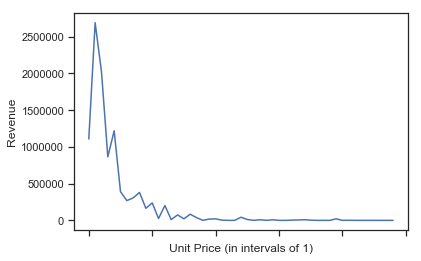

In [0]:
revenue_per_price.plot()
plt.xlabel('Unit Price (in intervals of '+str(price_interval)+')')
plt.ylabel('Revenue')
plt.show()

#### 8.4 Make it look nicer.
x-axis needs values.  
y-axis isn't that easy to read; show in terms of millions.

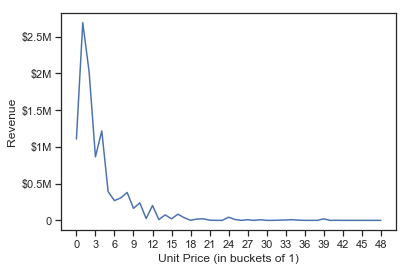

In [0]:
revenue_per_price.plot()

#Place labels
plt.xlabel('Unit Price (in buckets of '+str(price_interval)+')') 
plt.ylabel('Revenue')

#Even though the data is bucketed in intervals of 1,
#I'll plot ticks a little bit further apart from each other to avoid cluttering.
plt.xticks(np.arange(price_start,price_end,3),
           np.arange(price_start,price_end,3))
plt.yticks([0, 500000, 1000000, 1500000, 2000000, 2500000],
           ['0', '$0.5M', '$1M', '$1.5M', '$2M', '$2.5M'])
plt.show()

#Looks like a major chunk of our revenue comes from items worth $0-$3!

### BONUS: Create your own question and answer it.

# Pokemon

### Introduction:

This time you will create the data.



### Step 1. Import the necessary libraries

In [0]:
import pandas as pd

### Step 2. Create a data dictionary

In [0]:
raw_data = {"name": ['Bulbasaur', 'Charmander','Squirtle','Caterpie'],
            "evolution": ['Ivysaur','Charmeleon','Wartortle','Metapod'],
            "type": ['grass', 'fire', 'water', 'bug'],
            "hp": [45, 39, 44, 45],
            "pokedex": ['yes', 'no','yes','no']                        
            }

### Step 3. Assign it to a variable called pokemon

In [0]:
pokemon = pd.DataFrame(raw_data)
pokemon.head()

,evolution,hp,name,pokedex,type
0,Ivysaur,45,Bulbasaur,yes,grass
1,Charmeleon,39,Charmander,no,fire
2,Wartortle,44,Squirtle,yes,water
3,Metapod,45,Caterpie,no,bug


### Step 4. Ops...it seems the DataFrame columns are in alphabetical order. Place  the order of the columns as name, type, hp, evolution, pokedex

In [0]:
pokemon = pokemon[['name', 'type', 'hp', 'evolution','pokedex']]
pokemon

,name,type,hp,evolution,pokedex
0,Bulbasaur,grass,45,Ivysaur,yes
1,Charmander,fire,39,Charmeleon,no
2,Squirtle,water,44,Wartortle,yes
3,Caterpie,bug,45,Metapod,no


### Step 5. Add another column called place, and insert what you have in mind.

In [0]:
pokemon['place'] = ['park','street','lake','forest']
pokemon

,name,type,hp,evolution,pokedex,place
0,Bulbasaur,grass,45,Ivysaur,yes,park
1,Charmander,fire,39,Charmeleon,no,street
2,Squirtle,water,44,Wartortle,yes,lake
3,Caterpie,bug,45,Metapod,no,forest


### Step 6. Present the type of each column

In [0]:
pokemon.dtypes

name         object
type         object
hp            int64
evolution    object
pokedex      object
dtype: object

### BONUS: Create your own question and answer it.

# Apple Stock

### Introduction:

We are going to use Apple's stock price.


### Step 1. Import the necessary libraries

In [0]:
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt

%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv)

### Step 3. Assign it to a variable apple

In [0]:
url = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv'
apple = pd.read_csv(url)

apple.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


### Step 4.  Check out the type of the columns

In [0]:
apple.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

### Step 5. Transform the Date column as a datetime type

In [0]:
apple.Date = pd.to_datetime(apple.Date)

apple['Date'].head()

0   2014-07-08
1   2014-07-07
2   2014-07-03
3   2014-07-02
4   2014-07-01
Name: Date, dtype: datetime64[ns]

### Step 6.  Set the date as the index

In [0]:
apple = apple.set_index('Date')

apple.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


### Step 7.  Is there any duplicate dates?

In [0]:
# NO! All are unique
apple.index.is_unique

True

### Step 8.  Ops...it seems the index is from the most recent date. Make the first entry the oldest date.

In [0]:
apple.sort_index(ascending = True).head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45
1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41


### Step 9. Get the last business day of each month

In [0]:
apple_month = apple.resample('BM').mean()

apple_month.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-31,30.481538,30.567692,30.443077,30.443077,25862523,0.473077
1981-01-30,31.754762,31.826667,31.654762,31.654762,7249866,0.493810
1981-02-27,26.480000,26.572105,26.407895,26.407895,4231831,0.411053
1981-03-31,24.937727,25.016818,24.836364,24.836364,7962690,0.387727
1981-04-30,27.286667,27.368095,27.227143,27.227143,6392000,0.423333


### Step 10.  What is the difference in days between the first day and the oldest

In [0]:
(apple.index.max() - apple.index.min()).days

12261

### Step 11.  How many months in the data we have?

In [0]:
apple_months = apple.resample('BM').mean()

len(apple_months.index)

404

### Step 12. Plot the 'Adj Close' value. Set the size of the figure to 13.5 x 9 inches

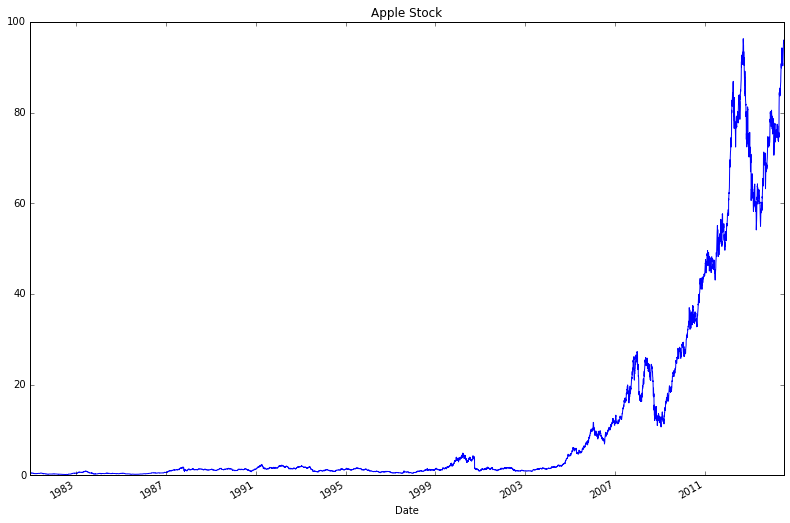

In [0]:
# makes the plot and assign it to a variable
appl_open = apple['Adj Close'].plot(title = "Apple Stock")

# changes the size of the graph
fig = appl_open.get_figure()
fig.set_size_inches(13.5, 9)

### BONUS: Create your own question and answer it.

# Iris

### Introduction:

This exercise may seem a little bit strange, but keep doing it.

### Step 1. Import the necessary libraries

In [0]:
import pandas as pd
import numpy as np

### Step 2. Import the dataset from this [address](https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data). 

### Step 3. Assign it to a variable called iris

In [0]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
iris = pd.read_csv(url)

iris.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


### Step 4. Create columns for the dataset

In [0]:
# 1. sepal_length (in cm)
# 2. sepal_width (in cm)
# 3. petal_length (in cm)
# 4. petal_width (in cm)
# 5. class

iris.columns = ['sepal_length','sepal_width', 'petal_length', 'petal_width', 'class']
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


### Step 5.  Is there any missing value in the dataframe?

In [0]:
pd.isnull(iris).sum()
# nice no missing value

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64

### Step 6.  Lets set the values of the rows 10 to 29 of the column 'petal_length' to NaN

In [0]:
iris.iloc[10:30,2:3] = np.nan
iris.head(20)

,sepal_length,sepal_width,petal_length,petal_width,class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
5,4.6,3.4,1.4,0.3,Iris-setosa
6,5.0,3.4,1.5,0.2,Iris-setosa
7,4.4,2.9,1.4,0.2,Iris-setosa
8,4.9,3.1,1.5,0.1,Iris-setosa
9,5.4,3.7,1.5,0.2,Iris-setosa


### Step 7. Good, now lets substitute the NaN values to 1.0

In [0]:
iris.petal_length.fillna(1, inplace = True)
iris

,sepal_length,sepal_width,petal_length,petal_width,class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
5,4.6,3.4,1.4,0.3,Iris-setosa
6,5.0,3.4,1.5,0.2,Iris-setosa
7,4.4,2.9,1.4,0.2,Iris-setosa
8,4.9,3.1,1.5,0.1,Iris-setosa
9,5.4,3.7,1.5,0.2,Iris-setosa


### Step 8. Now let's delete the column class

In [0]:
del iris['class']
iris.head()

,sepal_length,sepal_width,petal_length,petal_width
0,4.9,3.0,1.4,0.2
1,4.7,3.2,1.3,0.2
2,4.6,3.1,1.5,0.2
3,5.0,3.6,1.4,0.2
4,5.4,3.9,1.7,0.4


### Step 9.  Set the first 3 rows as NaN

In [0]:
iris.iloc[0:3 ,:] = np.nan
iris.head()

,sepal_length,sepal_width,petal_length,petal_width
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,5.0,3.4,1.5,0.2
4,4.4,2.9,1.4,0.2


### Step 10.  Delete the rows that have NaN

In [0]:
iris = iris.dropna(how='any')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width
3,5.0,3.4,1.5,0.2
4,4.4,2.9,1.4,0.2
5,4.9,3.1,1.5,0.1
6,5.4,3.7,1.5,0.2
7,4.8,3.4,1.0,0.2


### Step 11. Reset the index so it begins with 0 again

In [0]:
iris = iris.reset_index(drop = True)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.0,3.4,1.5,0.2
1,4.4,2.9,1.4,0.2
2,4.9,3.1,1.5,0.1
3,5.4,3.7,1.5,0.2
4,4.8,3.4,1.0,0.2


### BONUS: Create your own question and answer it.